In [1]:
#PR1 : HOUSE PRICE PREDICTION USING LINEAR REGRESSION

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("housing.csv")

In [3]:
print("No. of rows & cols:\n", data.shape)
print("Columns:\n", data.columns)

No. of rows & cols:
 (20640, 10)
Columns:
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [6]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
#missing values if any
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
#total_bedrooms has missing values
#Filling missing values with the mean
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace=True)

In [9]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
#remove duplicates if any
data = data.drop_duplicates()
print("No. of rows & cols after removing duplicates:\n", data.shape)

No. of rows & cols after removing duplicates:
 (20640, 10)


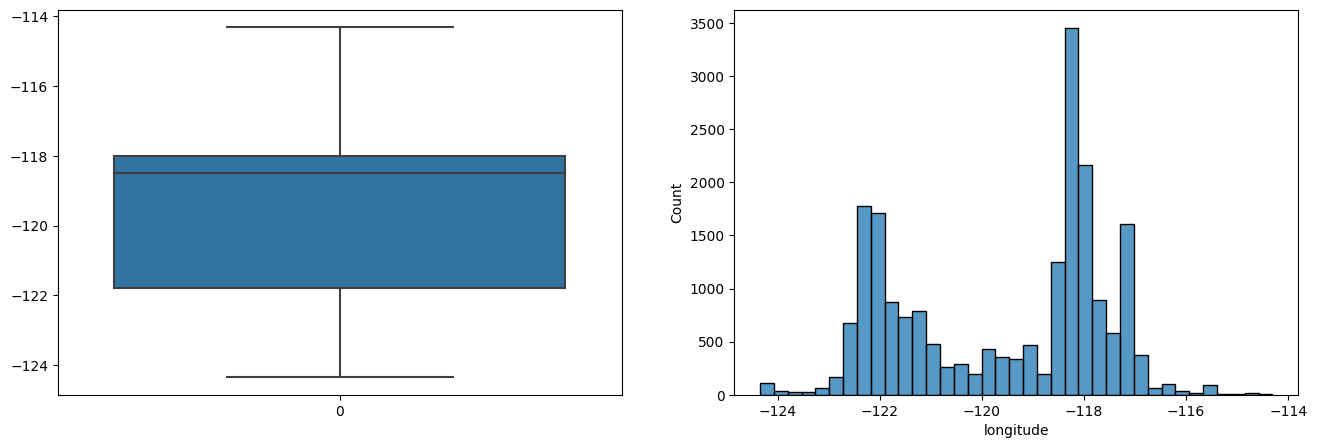

In [11]:
#Outlier Detection Using Box plot
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt1=sns.boxplot(data['longitude'])
plt.subplot(1,2,2)
plt2=sns.histplot(data['longitude'])

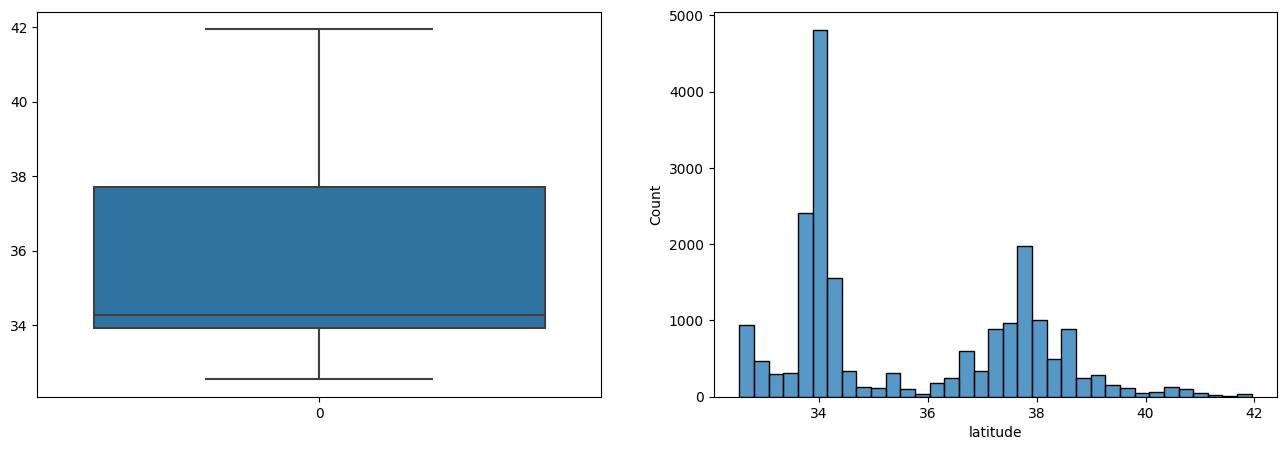

In [12]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt1=sns.boxplot(data['latitude'])
plt.subplot(1,2,2)
plt2=sns.histplot(data['latitude'])

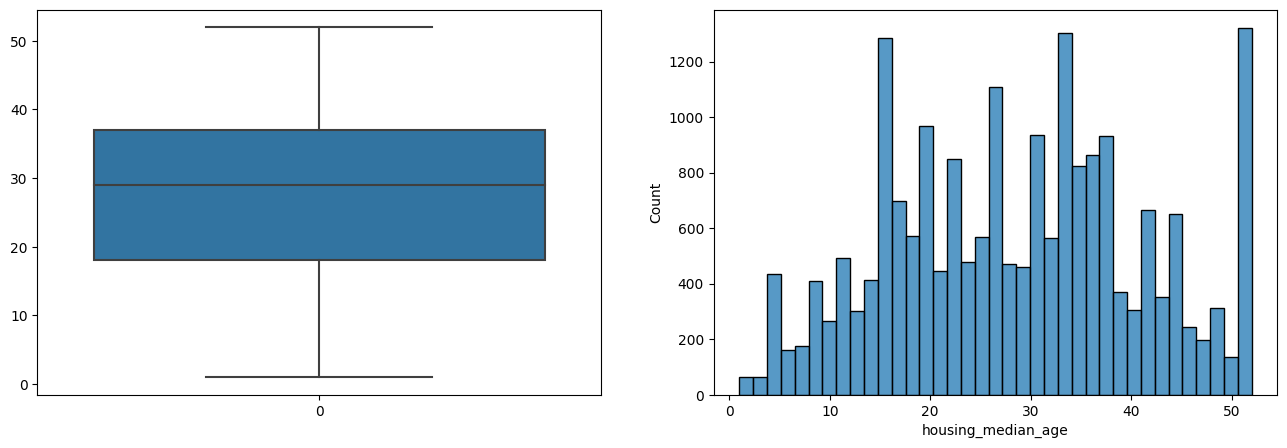

In [13]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt1=sns.boxplot(data['housing_median_age'])
plt.subplot(1,2,2)
plt2=sns.histplot(data['housing_median_age'])

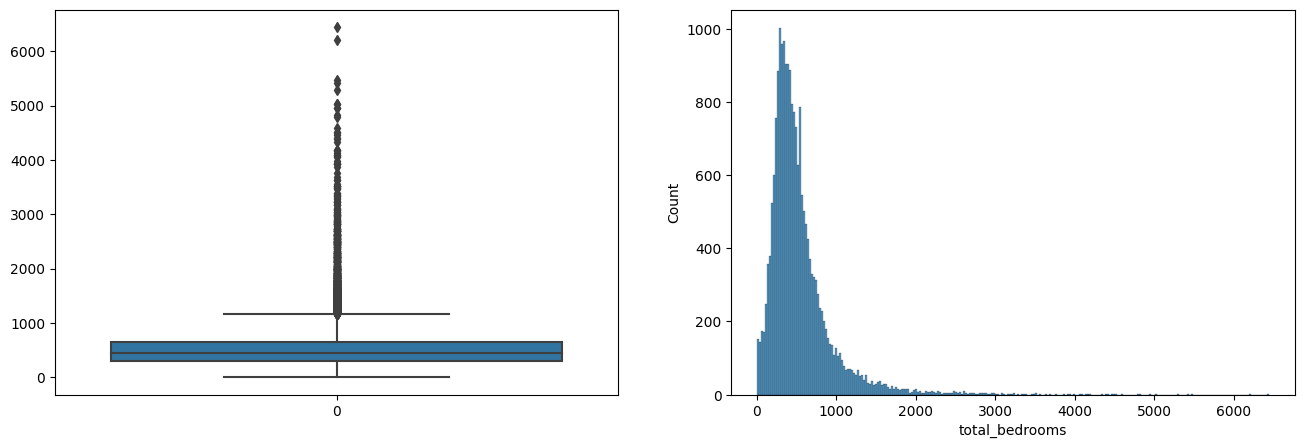

In [14]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt1=sns.boxplot(data['total_bedrooms'])
plt.subplot(1,2,2)
plt2=sns.histplot(data['total_bedrooms'])

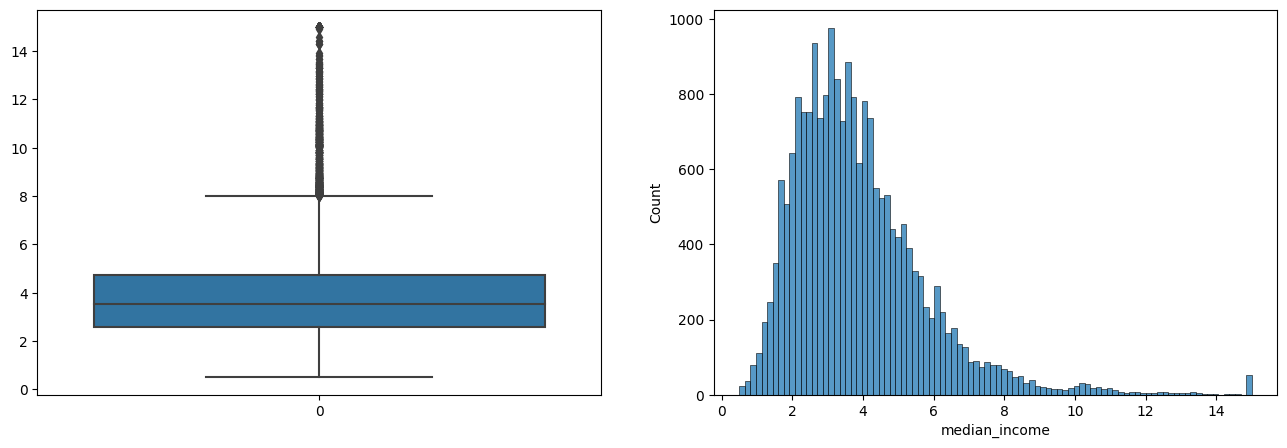

In [15]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt1=sns.boxplot(data['median_income'])
plt.subplot(1,2,2)
plt2=sns.histplot(data['median_income'])

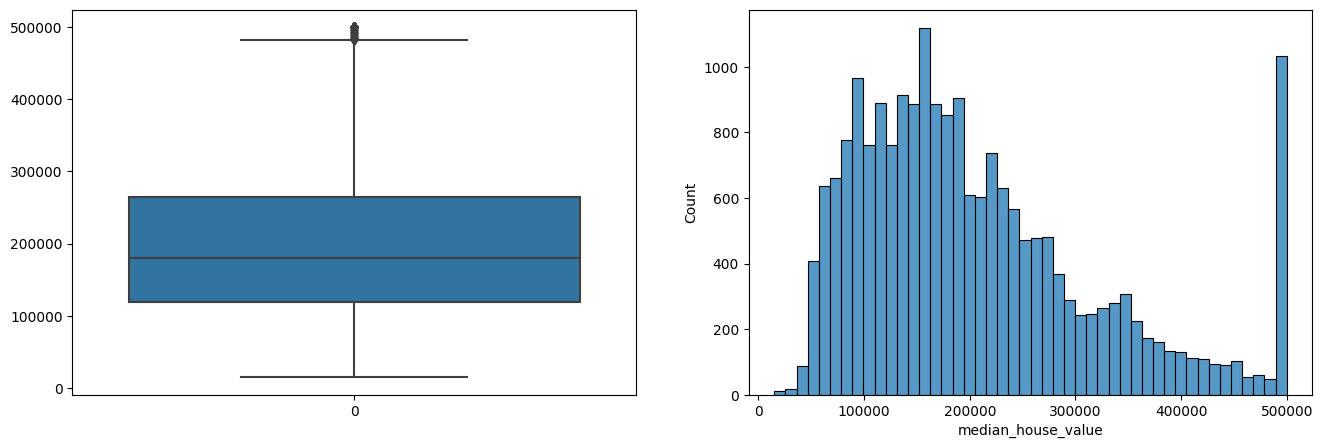

In [16]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt1=sns.boxplot(data['median_house_value'])
plt.subplot(1,2,2)
plt2=sns.histplot(data['median_house_value'])

In [17]:
#remove outliers
def outliersTreatment(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    
    UB = Q1 + 1.5 * IQR
    LB = Q1 - 1.5 * IQR
    
    df = df[(df[col] <= UB) & (df[col] >= LB)]
    
    plt.figure(figsize=(16, 5))
    sns.boxplot(x = df[col])
    plt.show()

    global data
    data = df

Q1: 2.5633999999999997
Q3: 4.74325
IQR: 2.17985


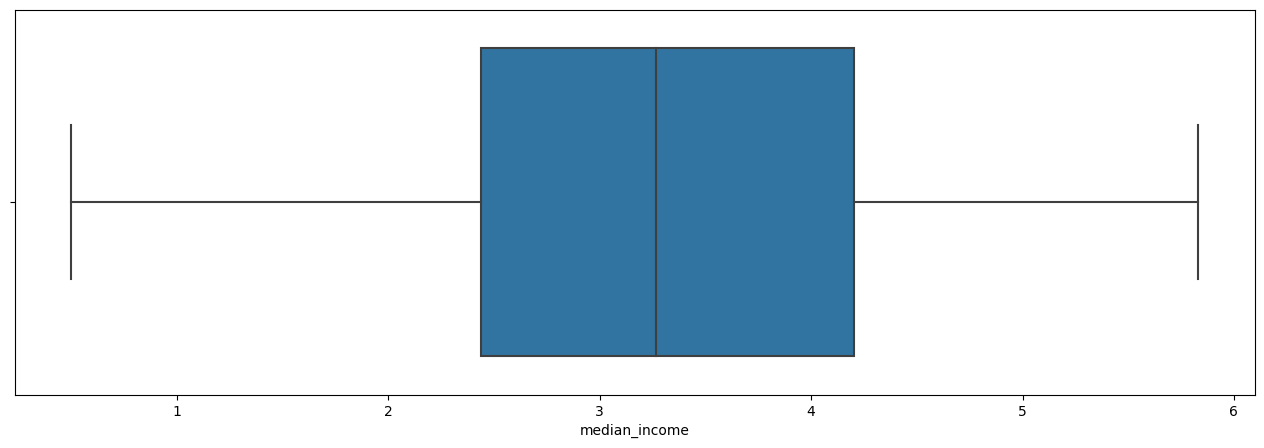

Q1: 112500.0
Q3: 230075.0
IQR: 117575.0


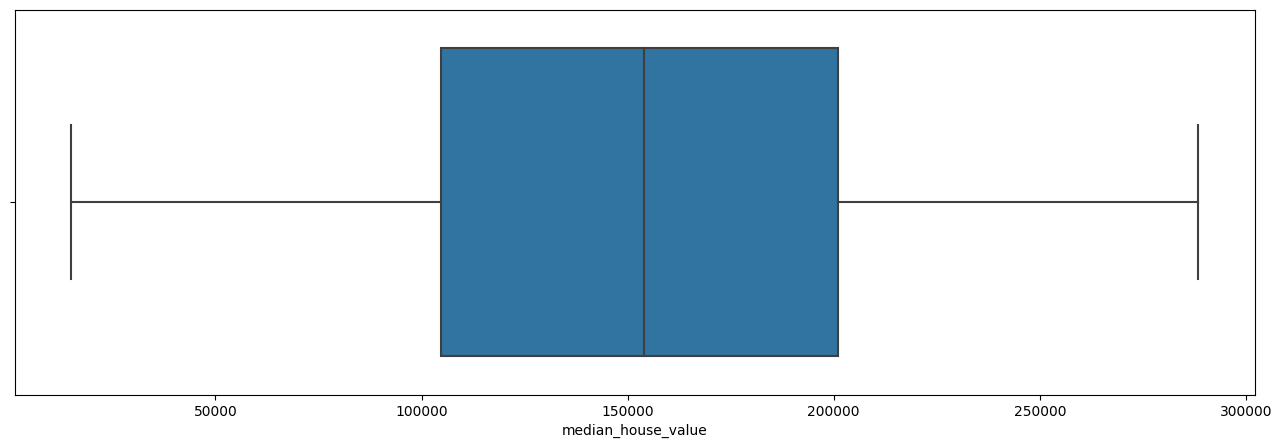

In [18]:
outliersTreatment(data, 'median_income')
outliersTreatment(data, 'median_house_value')

In [19]:
data = pd.get_dummies(data, columns=['ocean_proximity'])

In [20]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.922145,-0.076614,0.048315,0.076164,0.113470,0.064165,0.011712,0.006822,0.292944,-0.097021,0.004102,-0.429695,0.084243
latitude,-0.922145,1.000000,-0.023814,-0.025488,-0.070649,-0.131399,-0.079439,-0.079519,-0.210500,-0.438490,0.389428,-0.008212,0.303972,-0.194289
housing_median_age,-0.076614,-0.023814,1.000000,-0.384693,-0.347295,-0.288801,-0.329845,-0.196344,0.041116,0.104823,-0.250924,0.000440,0.225460,0.018892
total_rooms,0.048315,-0.025488,-0.384693,1.000000,0.942220,0.850827,0.926844,0.224948,0.133176,-0.035167,0.070320,-0.006926,-0.033722,-0.022890
total_bedrooms,0.076164,-0.070649,-0.347295,0.942220,1.000000,0.869053,0.973178,0.059462,0.115992,0.013234,0.002985,-0.006176,-0.025327,-0.002019
population,0.113470,-0.131399,-0.288801,0.850827,0.869053,1.000000,0.905894,0.078576,0.077217,0.086318,-0.040001,-0.007222,-0.059733,-0.018148
households,0.064165,-0.079439,-0.329845,0.926844,0.973178,0.905894,1.000000,0.085471,0.139268,0.040533,-0.031818,-0.006826,-0.018476,0.002962
median_income,0.011712,-0.079519,-0.196344,0.224948,0.059462,0.078576,0.085471,1.000000,0.557060,0.165169,-0.166591,-0.004337,0.019033,-0.017296
median_house_value,0.006822,-0.210500,0.041116,0.133176,0.115992,0.077217,0.139268,0.557060,1.000000,0.393154,-0.553505,0.017016,0.124354,0.128314
ocean_proximity_<1H OCEAN,0.292944,-0.438490,0.104823,-0.035167,0.013234,0.086318,0.040533,0.165169,0.393154,1.000000,-0.661962,-0.006616,-0.262717,-0.296194


<Axes: >

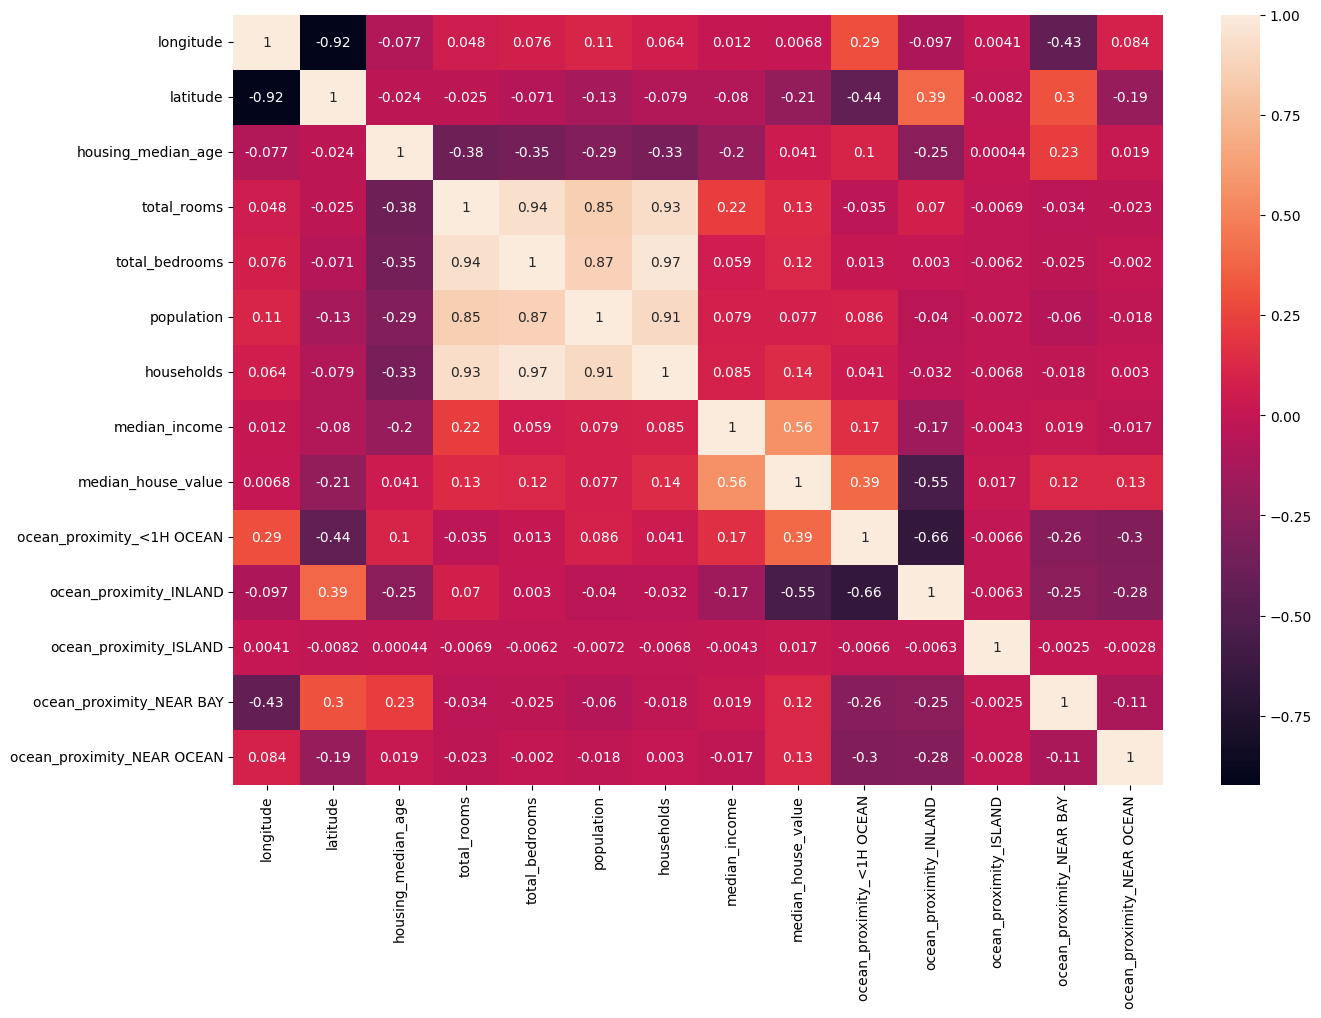

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)

In [22]:
#converting to 2D
x=data.median_income.values
print(x)
x=data.median_income.values.reshape(-1,1)
x

[4.0368 3.12   2.0804 ... 1.7    1.8672 2.3886]


array([[4.0368],
       [3.12  ],
       [2.0804],
       ...,
       [1.7   ],
       [1.8672],
       [2.3886]])

In [23]:
y=data.median_house_value.values
print(y)
y=data.median_house_value.values.reshape(-1,1)
y

[269700. 241400. 226700. ...  92300.  84700.  89400.]


array([[269700.],
       [241400.],
       [226700.],
       ...,
       [ 92300.],
       [ 84700.],
       [ 89400.]])

In [24]:
#splitting data into train & test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(12647, 1) (3162, 1)
(12647, 1) (3162, 1)


In [25]:
#model training
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [26]:
#model evaluation
lr.intercept_, lr.coef_
y_pred = lr.intercept_ + lr.coef_ * x_train
y_pred

array([[160194.44412563],
       [140216.19238117],
       [102298.16219507],
       ...,
       [168518.21011208],
       [156041.66145965],
       [203957.91784522]])

In [27]:
#predict
y_pred = lr.predict(x_test)
y_pred

array([[179820.81654995],
       [107715.89034806],
       [108437.8496428 ],
       ...,
       [161438.15551573],
       [169789.22248392],
       [ 87079.38159957]])

In [28]:
#performance measures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

41264.36287822512
2626504084.415716
0.30689967582091393


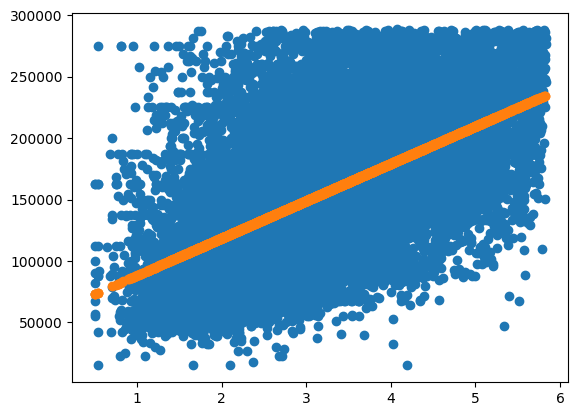

In [29]:
#visualization
plt.scatter(x,y)
plt.scatter(x_test,y_pred)